In [23]:
import torch
from torch import nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Generate Data

In [24]:
N = 1000000 # Number of samples

Create a gaussian model with mean 2.0 and variance 1.0.

In [25]:
gauss_orig = torch.distributions.Normal(torch.tensor([2.0]), torch.tensor([1.0]))

Now we generate samples form the original distribution. These samples are what we generally observe as dataset. 

In [26]:
x = gauss_orig.sample((N,))

In [27]:
print (x.size())
print (x.mean())

torch.Size([1000000, 1])
tensor(1.9974)


## Grid search for max likelihood

Now that we got the dataset x, we want to find the original ditribution which generated this data to the best we can. We assume that the data has been generated by some Gaussian distribition. We wish to calculate the maxmimum likelihood for the parameter mu (and assume the variance to be 1.0) which explains the data. We now will loop through the different values of mu, and report the mu which maximizes the likelihood.

In [28]:
np.arange(-5.0,5.0,0.5)

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [31]:
x_axis = np.arange(-10.0,10.0,0.5)
likelihood_values = []
for mu in x_axis:
    candidate_guass = torch.distributions.Normal(torch.tensor(mu), torch.tensor([1.0])) # Create the model 
    log_likelihoods = candidate_guass.log_prob(x)
    avg_likelihood = torch.exp(log_likelihoods).mean()
    likelihood_values.append(avg_likelihood)

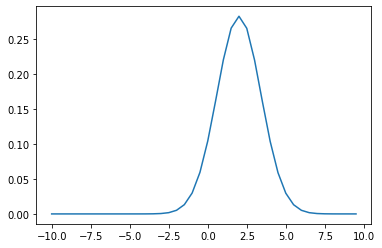

In [32]:
plt.plot(x_axis,torch.Tensor(likelihood_values))

### Clearly the likelihood was maximum at 2.0. Who needs Gradient decscent. We have grid search :D